In [1]:
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
        'td {font-size: 25px}'
    '</style>'
))

In [2]:
import warnings
warnings.filterwarnings("ignore")
import constants as const
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

points = const.POINTS
features = const.FEATURES

In [3]:
#import test data
#df_test =pd.read_csv("synthetic_test.csv", header=None)
#x_test = df_test.iloc[:,0:features+1]
#y_test = df_test.iloc[:,features+1]

In [57]:
def create_plot(x,y,x_title,y_title,full_title, fig_name):
    
    fig,ax = plt.subplots(figsize = (18,14))
    ax.plot(x,y,color ='red',linewidth=3, marker = 'o',markersize=10)
    
    ax.grid(True,linestyle='dashdot', color='grey')
    ax.tick_params(labelcolor='red', labelsize=15,pad=10,direction = 'inout', width=3)
    
    ax.set_xlabel(x_title,fontsize=20)
    ax.set_ylabel(y_title,fontsize=20)
    ax.set_title(full_title,fontsize=25,pad =15)
    
    plt.savefig('/figures/'+fig_name)
    
def create_merged_plot(y1,y2,x,x_title,y_title,full_title,cases, xlim, fig_name):
    
    fig,ax = plt.subplots(figsize = (18,14))
    
    ax.plot(x,y1,linewidth=3, label=cases[0],color = '#d62728')
    ax.plot(x,y2,linewidth=3, label=cases[1],color = '#17becf')
    plt.fill_between(x, y1, y2, color="grey", alpha="0.3")
    
    ax.legend(fontsize=20)
    ax.grid(True,linestyle='dashdot', color='grey')
    ax.tick_params(labelcolor='red', labelsize=15,pad=10,direction = 'inout', width=3)
    
    # ax.set_xlim(100, 5000)
    ax.set_ylim(12,14)

    ax.set_xlabel(x_title,fontsize=20)
    ax.set_ylabel(y_title,fontsize=20)
    ax.set_title(full_title,fontsize=25,pad =15)
    
    plt.savefig(fig_name)
    

In [43]:
# useful functions for data evaluation
# def predict(w):
#     x = x_test.to_numpy()
#     b = const.BIAS
# 
#     y_pred=[]
#     for i in range(len(x)):
#         y=np.asscalar(np.dot(w,x[i].T)+b)
#         y_pred.append(y)
#     return np.array(y_pred)
###############################################################################
def import_data(file):
    df = pd.read_csv(file,header=None)
    w = df.iloc[:,0:features+1]
    epoch = df.iloc[:,features+1]
    return w,epoch
###############################################################################
def norm_to_array(arr):
    res = np.apply_along_axis(np.linalg.norm, 1 ,arr)
    return res
###############################################################################
def process_norm(norm,epoch,head):
    df_array =pd.DataFrame(data=norm,columns=[head])
    df_array.loc[:,'time'] = pd.Series(epoch, index=df_array.index)
    return df_array
###############################################################################
def plot_norms(arr1,arr2,head1,head2,title, fig_name):
    merged = pd.merge(arr1, arr2,on='time',how='outer').sort_values\
        (by='time')

    x_axis = merged['time']
    y1 = merged[head1].fillna(method='ffill')
    y2 = merged[head2].fillna(method='ffill')

    create_merged_plot(y1=y1,
                       y2=y2,
                       x=x_axis,
                       x_title='unit time',
                       y_title='model norm ||w||',
                       full_title=title,
                       cases=[head1,head2],
                       xlim=1000,
                       fig_name=fig_name)

    # dif0 = (np.absolute(y2 - y1)/y2)*100
    # plt.figure(figsize=(20,10))
    # plt.xlabel("unit_time")
    # plt.ylabel("error")
    # plt.plot(x_axis, dif0)
###############################################################################
# def calc_rmse(w, epoch):
#     pred = np.apply_along_axis(predict, 1 ,w)
#
#     rmse = np.zeros(len(epoch))
#     for itr in range(len(epoch)):
#         rmse[itr] = mean_squared_error(y_test, pred[itr],squared=False)
#     return rmse

# Centralized OLS vs SGD

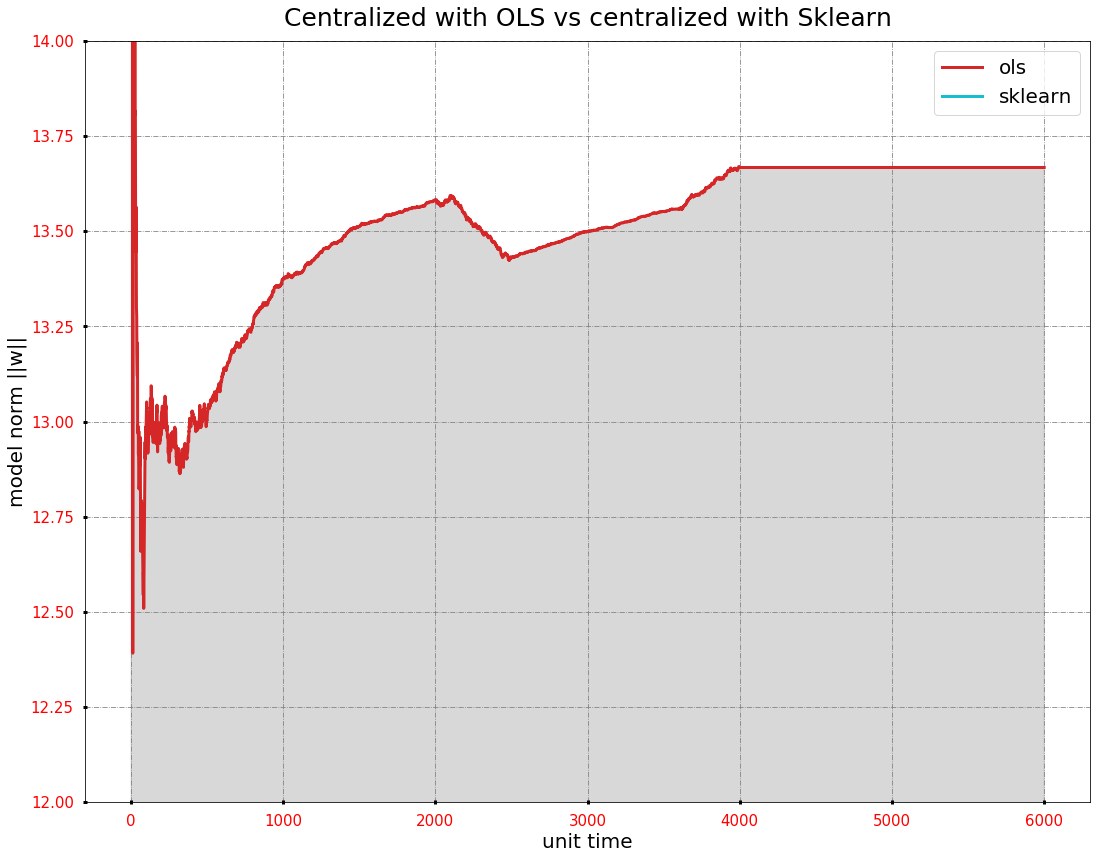

In [58]:
# import data
w_central,epoch_central = import_data("centralized.csv")
w_central2,epoch_central2 = import_data("centralized_sgd.csv")
# calc norms
norm_central = norm_to_array(w_central)
norm_central2 = norm_to_array(w_central2)
# process data
df_norm_central = process_norm(norm_central,epoch_central,'ols')
df_norm_central2 = process_norm(norm_central2,epoch_central2,'sklearn')
# plot diagrams
plot_norms(df_norm_central,df_norm_central2,'ols','sklearn', 'Centralized with OLS vs centralized with Sklearn','figures/295_A1')
#calculate rmse
#rmse_central = calc_rmse(w_central,epoch_central)
#rmse_central2 = calc_rmse(w_central2,epoch_central2)

# Centralized OLS vs Periodic

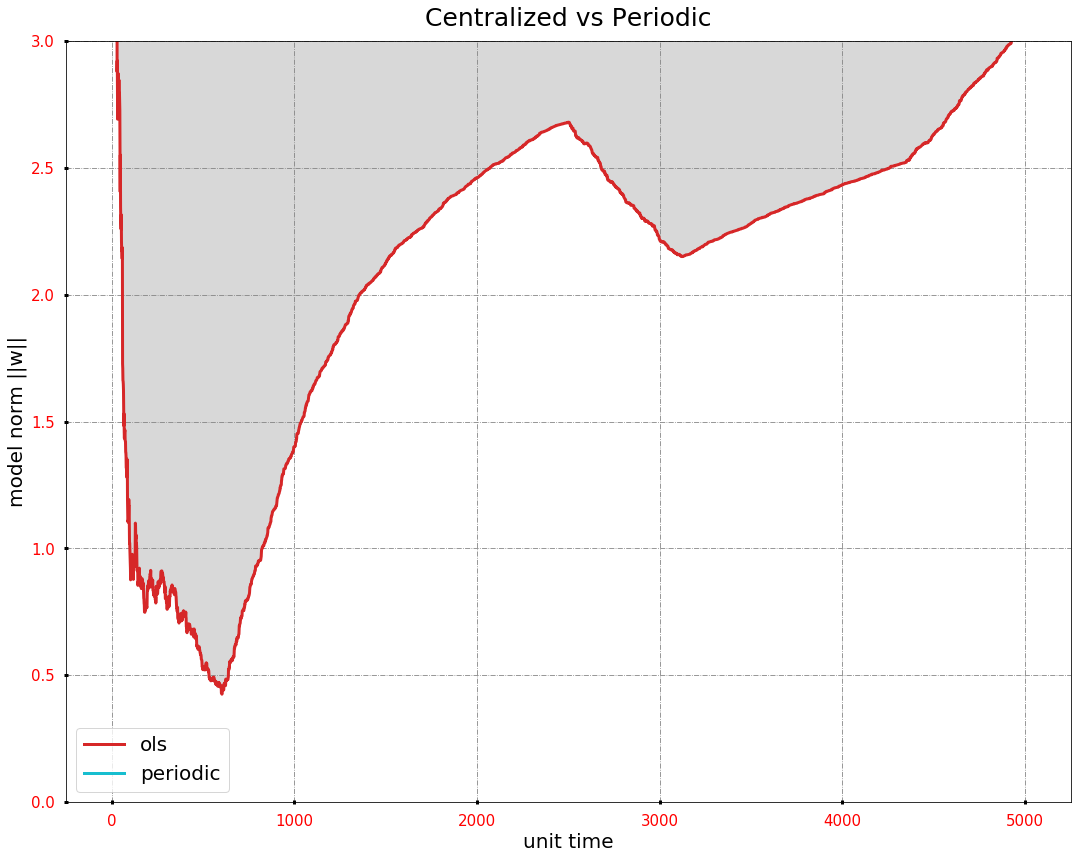

In [7]:
# import data
w_periodic,epoch_periodic = import_data("periodic.csv")
# calc norms
norm_periodic = norm_to_array(w_periodic)
# process data
df_norm_periodic = process_norm(norm_periodic,epoch_periodic,'periodic')
# plot diagrams
plot_norms(df_norm_central,df_norm_periodic,'ols','periodic','Centralized vs Periodic','figures/295_B1')
#calculate rmse
#rmse_periodic = calc_rmse(w_periodic,epoch_periodic)

# Centralized OLS vs GM

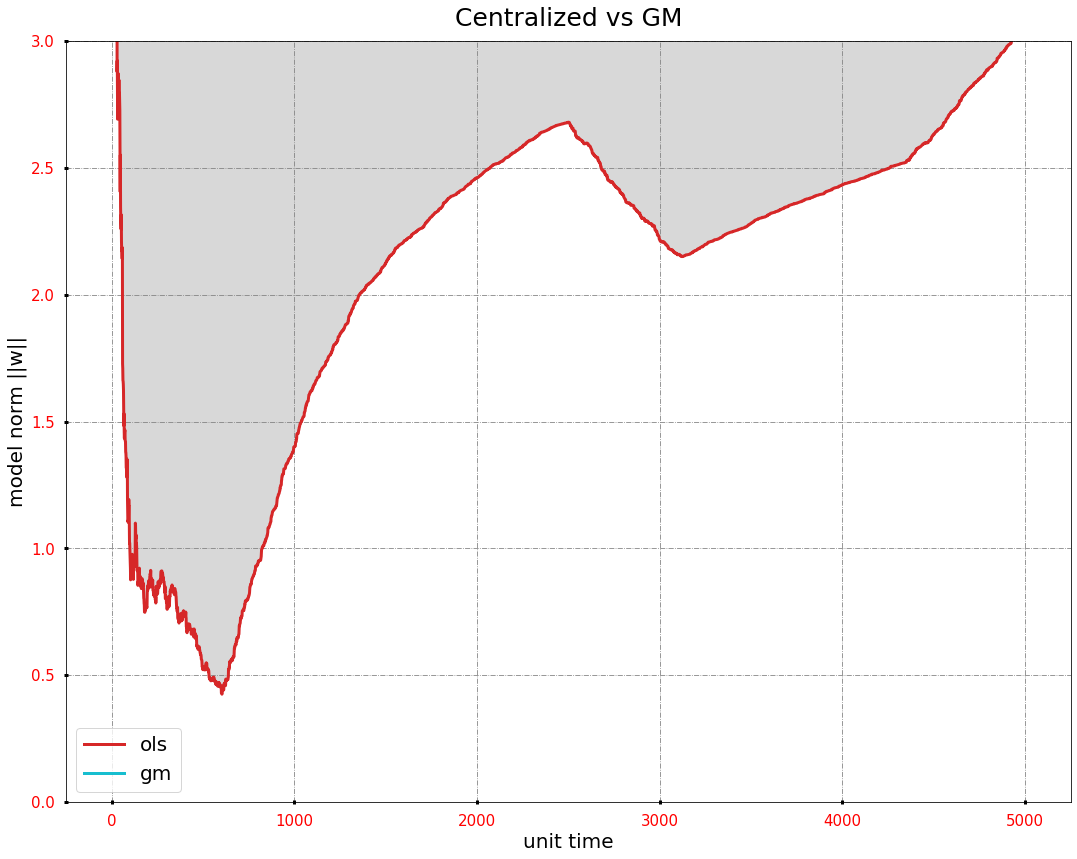

In [8]:
# import data
w_gm,epoch_gm = import_data("gm.csv")
# calc norms
norm_gm = norm_to_array(w_gm)
# process data
df_norm_gm = process_norm(norm_gm,epoch_gm,'gm')
# plot diagrams
plot_norms(df_norm_central,df_norm_gm,'ols','gm','Centralized vs GM','figures/295_C1')
#calculate rmse
#rmse_gm = calc_rmse(w_gm,epoch_gm)

# Centralized Sklearn vs FGM

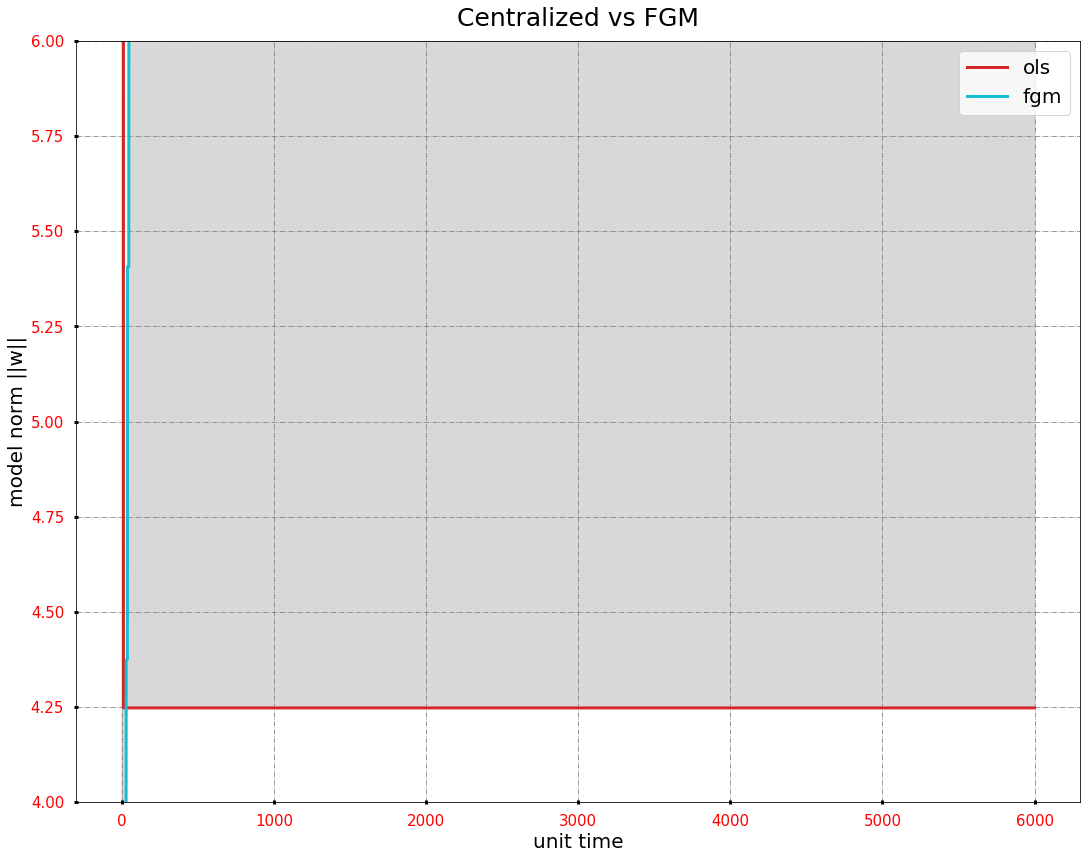

In [28]:
# import data
w_fgm,epoch_fgm = import_data("fgm.csv")
# calc norms
norm_fgm = norm_to_array(w_fgm)
# process data
df_norm_fgm = process_norm(norm_fgm,epoch_fgm,'fgm')
# plot diagrams
plot_norms(df_norm_central,df_norm_fgm,'ols','fgm','Centralized vs FGM','figures/295_D1')
#calculate rmse
#rmse_gm = calc_rmse(w_gm,epoch_gm)